<a href="https://colab.research.google.com/github/akliima/Font/blob/main/Decision_Tree_Python_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import numpy as np
import pandas as pd 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import plot_tree

In [54]:
from pandas.io.parsers.readers import read_csv
df = read_csv('book3.csv')
df.head()


,Total Purchased,Class Label,Vouchar
0,500,440,No
1,1200,440,Yes
2,100,330,No
3,3000,330,Yes
4,400,440,No


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Total Purchased  99 non-null     int64 
 1   Class Label      99 non-null     int64 
 2   Vouchar          99 non-null     object
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [56]:
df.shape

(99, 3)

In [57]:
df.isnull().any()

Total Purchased    False
Class Label        False
Vouchar            False
dtype: bool

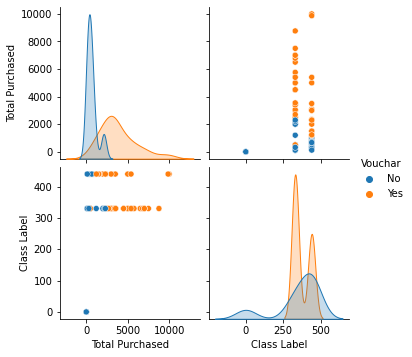

In [58]:
sns.pairplot(data=df, hue = 'Vouchar')


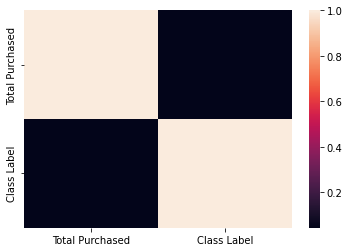

In [59]:
sns.heatmap(df.corr())

In [60]:
target = df['Vouchar']
df1 = df.copy()
df1 = df1.drop('Vouchar', axis =1)

In [61]:
X = df1

In [62]:
target

0      No
1     Yes
2      No
3     Yes
4      No
     ... 
94    Yes
95    Yes
96    Yes
97    Yes
98    Yes
Name: Vouchar, Length: 99, dtype: object

In [63]:
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
y = target

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 1)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (79, 2)
Testing split input-  (20, 2)


In [72]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [75]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [81]:
feature_cols = ['Total Purchased', 'Class Label']
X = df[feature_cols]

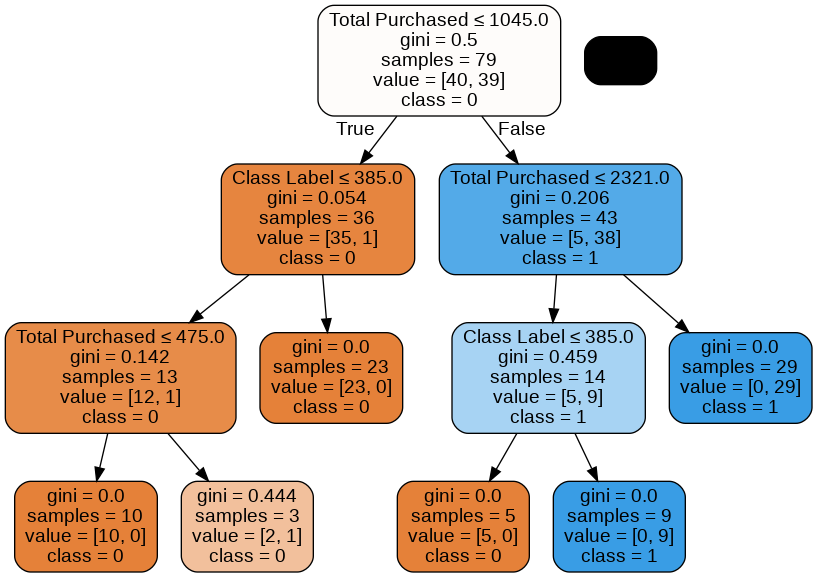

In [82]:
from IPython.display import Image
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dd.PNG')
Image(graph.create_png())